In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from Bio import SeqIO
import numpy as np
import seaborn as sns

In [4]:
df=pd.read_table('pepBLAST/BlastP_pc_qc', header=None, 
                names=['query id', 'subject id', '% identity', 
                       'mismatches', 'evalue', 
                       'bit score', 'qcovs', 'qcovhsp'])

In [5]:
df.head()

,query id,subject id,% identity,mismatches,evalue,bit score,qcovs,qcovhsp
0,pept_1_score_48,g5641.t1,100.000,0,2.0,21.6,100,100
1,pept_1_score_48,g15153.t1,100.000,0,2.1,21.6,100,100
2,pept_2_score_65,g5641.t1,100.000,0,1.5,21.9,100,100
3,pept_2_score_65,g12562.t1,88.889,1,3.3,20.8,100,100
4,pept_2_score_65,g5616.t1,88.889,1,6.7,20.0,100,100


In [13]:
df['qcovhsp'].value_counts()

100    98
92      6
73      4
89      2
78      2
75      2
72      2
90      1
67      1
Name: qcovhsp, dtype: int64

In [6]:
print(np.mean(df['mismatches']))
df['mismatches'].value_counts()

1.1610169491525424


0    64
1    23
2    13
6     5
5     4
3     4
4     3
7     2
Name: mismatches, dtype: int64

100.0
90.23499152542371
50.484643689090085


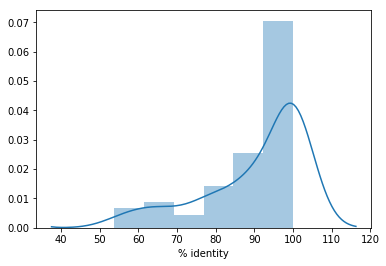

In [16]:
sns.distplot(df['% identity'])
print(np.median(df['% identity']))
print(np.mean(df['% identity']))
print(np.mean(df['% identity']-3*np.std(df['% identity'])))

Text(0,0.5,'Protein quantity')

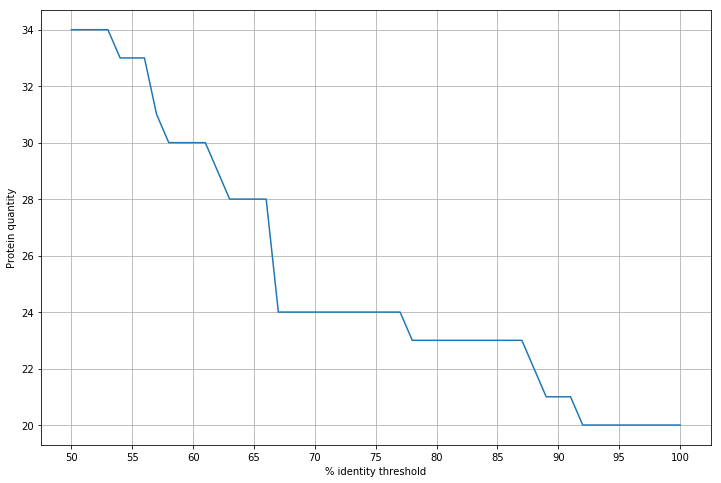

In [8]:
plt.figure(figsize=[12, 8])
plt.plot([i for i in range(50, 101)], 
         [len(df['subject id'][df['% identity']>=i].unique()) for i in range(50, 101)])
plt.xticks(range(50, 101, 5))
plt.grid()
plt.xlabel('% identity threshold')
plt.ylabel('Protein quantity')

Text(0,0.5,'Protein quantity')

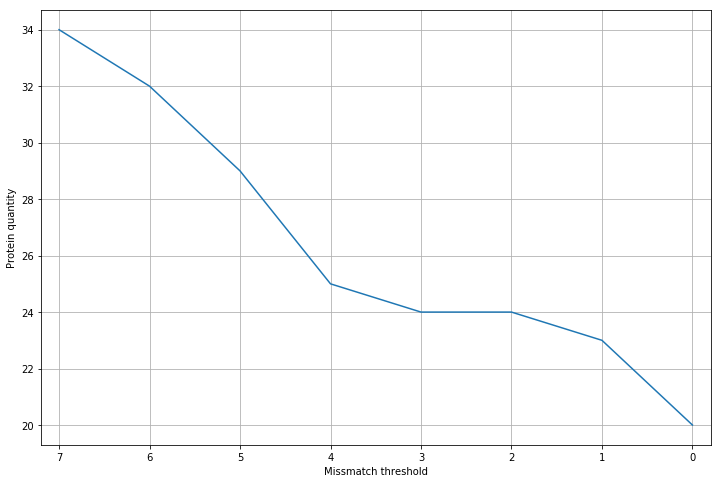

In [9]:
plt.figure(figsize=[12, 8])
plt.plot([i for i in range(7, -1, -1)], 
         [len(df['subject id'][df['mismatches']<=i].unique()) for i in range(7, -1, -1)])
plt.xticks(range(7, -1, -1))
plt.xlim(7.2,-0.2)
plt.grid()
plt.xlabel('Missmatch threshold')
plt.ylabel('Protein quantity')

In [19]:
print(df['qcovs'].mean())
df['% identity'][df['mismatches']==1].mean()

96.85593220338983


89.66856521739128

In [39]:
peptide_list=list(df['subject id'][(df['qcovs']==100)&(df['% identity']>=85)].unique())+list(df['subject id']\
                      [(df['qcovs']<=90)&(df['% identity']==100)].unique())
peptide_list=np.unique(peptide_list)

In [40]:
fid=open('Prot_list_pc_qc.txt', 'w')
[fid.write(line+'\n') for line in peptide_list]
fid.close()

In [41]:
def prot_file(inp, out, seq_list):
    inp=open(inp, 'r')
    out=open(out, 'w')
    count=0
    for record in SeqIO.parse(inp, 'fasta'):
        if record.name in seq_list:
            SeqIO.write(record, out, 'fasta')
            count+=1
    assert(count==len(seq_list))
    inp.close()
    out.close()

In [42]:
prot_file('ScriptAltrun/augustus.whole.aa', 'Pep_aligned_pc_qc.fa', peptide_list)

# UniProtKB search

In [106]:
df=pd.read_table('BlastPepA_pcq6', header=None, 
                names=['query id', 'subject id', '% identity', 
                       'evalue', 'score', 'bit score', '% query coverage'])
df['accession']=df['subject id'].apply(lambda x: x.split('|')[1])
df

,query id,subject id,% identity,evalue,score,bit score,% query coverage,accession
0,g702.t1,sp|O45599|CBD1_CAEEL,42.857,9.900000e-02,85,37.4,20,O45599
1,g702.t1,sp|Q9W5U2|CHI10_DROME,30.508,1.000000e+00,77,34.3,27,Q9W5U2
2,g702.t1,sp|P50284|TNR3_MOUSE,36.364,1.500000e+00,74,33.1,25,P50284
3,g702.t1,sp|Q9VMM6|OBSTE_DROME,35.294,2.100000e+00,73,32.7,24,Q9VMM6
4,g702.t1,sp|A8WVU7|CPG1_CAEBR,23.853,2.200000e+00,74,33.1,50,A8WVU7
5,g702.t1,sp|Q54DP7|MYBR_DICDI,31.667,2.900000e+00,72,32.3,28,Q54DP7
6,g702.t1,sp|Q17802|CPG1_CAEEL,25.000,4.400000e+00,71,32.0,35,Q17802
7,g702.t1,sp|Q11T54|Y2147_CYTH3,30.000,5.100000e+00,70,31.6,30,Q11T54
8,g702.t1,sp|A8XWX5|CPG2_CAEBR,45.833,5.700000e+00,70,31.6,11,A8XWX5
9,g702.t1,sp|Q9HMN5|SRP54_HALSA,35.484,6.300000e+00,70,31.6,14,Q9HMN5


In [82]:
def get_top_hits(frame):
    tops=pd.DataFrame()
    for prot in frame['query id'].unique():
        '''
        max_id=max(frame['% identity'][frame['query acc.ver']==prot])
        min_eval=min(frame['evalue'][frame['query acc.ver']==prot])
        '''
        temp=frame[frame['query id']==prot]
        maximum=np.NINF
        rows=[]
        for index, row in temp.iterrows():
            if row['bit score']>maximum:
                maximum=row['bit score']
                rows=[index]
            elif row['bit score']==maximum:
                rows.append(index)
        temp=temp.loc[rows, :]
        if len(rows)!=1:
            s_rows=[]
            minimum=np.Inf
            for index, row in temp.iterrows():
                if row['evalue']<minimum:
                    minimum=row['evalue']
                    s_rows=[index]
                elif row['evalue']==minimum:
                    s_rows.append(index)
            temp=temp.loc[s_rows, :]
            if len(s_rows)!=1:
                t_rows=[]
                maximum=np.NINF
                for index, row in temp.iterrows():
                    if row['% identity']>minimum:
                        maximum=row['% identity']
                        t_rows=[index]
                    elif row['% identity']==maximum:
                        t_rows.append(index)
                assert(len(t_rows)!=0)
                assert(len(t_rows)==1)
                temp=temp.loc[t_rows, :]
            elif len(s_rows):
                print('ALERT2', prot)
        elif len(rows)==0:
            print('ALERT', prot)
        tops=tops.append(temp)
    tops.index=range(tops.shape[0])
    return tops

In [92]:
tops=get_top_hits(df)
print(tops.shape[0])
len(tops['query id'].unique())

20


20

In [94]:
tops

,query id,subject id,% identity,evalue,score,bit score,% query coverage,accession
0,g702.t1,sp|O45599|CBD1_CAEEL,42.857,9.900000e-02,85,37.4,20,O45599
1,g1285.t1,sp|O45599|CBD1_CAEEL,35.000,1.300000e-01,83,36.6,39,O45599
2,g3428.t1,sp|Q09510|MLRH_CAEEL,56.604,9.490000e-65,505,199.0,92,Q09510
3,g3679.t1,sp|Q19269|NAS14_CAEEL,29.717,8.050000e-22,243,98.2,73,Q19269
4,g4106.t1,sp|Q5XIN3|MIPT3_RAT,26.829,8.200000e-01,83,36.6,13,Q5XIN3
5,g5237.t1,sp|B8EA73|RUVC_SHEB2,27.885,3.600000e-02,85,37.4,45,B8EA73
6,g5443.t1,sp|Q5UPK9|YL138_MIMIV,23.529,1.700000e+00,70,31.6,71,Q5UPK9
7,g5467.t1,sp|O45599|CBD1_CAEEL,42.593,8.860000e-04,96,41.6,37,O45599
8,g5502.t1,sp|O45599|CBD1_CAEEL,38.889,1.000000e-03,101,43.5,22,O45599
9,g5503.t1,sp|O45599|CBD1_CAEEL,37.037,5.000000e-03,95,41.2,25,O45599


In [89]:
tops.to_excel('Top_hits.xlsx')

In [104]:
tops[['query id', 'accession', '% identity', 'evalue', '% query coverage']].to_excel('For_J.xlsx')